# 1. Overview of Dataset
The GTZAN dataset is a widely used benchmark dataset for music genre classification tasks. It consists of 1,000 audio tracks, each lasting 30 seconds, and is divided into 10 music genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock—with 100 tracks per genre. Each audio file is a mono 16-bit WAV file sampled at 22,050 Hz.

It is available in various formats, including raw audio and pre-extracted feature sets (such as features extracted from 30-second or 3-second segments)

## Importing Libraries

In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (Audio File Handling)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = 'Dataset'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
y, sr = librosa.load(f"{general_path}/genres_original/reggae/reggae.00036.wav")

print(y) # amplitude of signal 

print(np.shape(y)) # samples

print(sr) # sampling rate - 22,050 audio samples per second.

print('Check Len of Audio:', 661794/22050)

[0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]
(661794,)
22050
Check Len of Audio: 30.013333333333332


In [4]:
# trim leading and trailing silence from the audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


## Audio Visualisation

In [5]:
#Playing the audio within the notebook
ipd.Audio(audio_file, rate=sr)

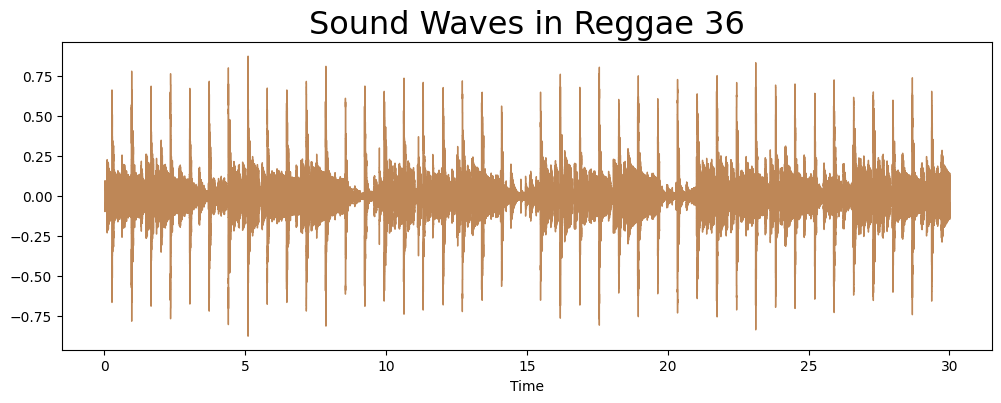

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=audio_file, sr=sr, color="#BE8757")
plt.title("Sound Waves in Reggae 36", fontsize=23)
plt.show()

__Fourier Transform__
- Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
- Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [7]:
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# short-time fourier transform
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


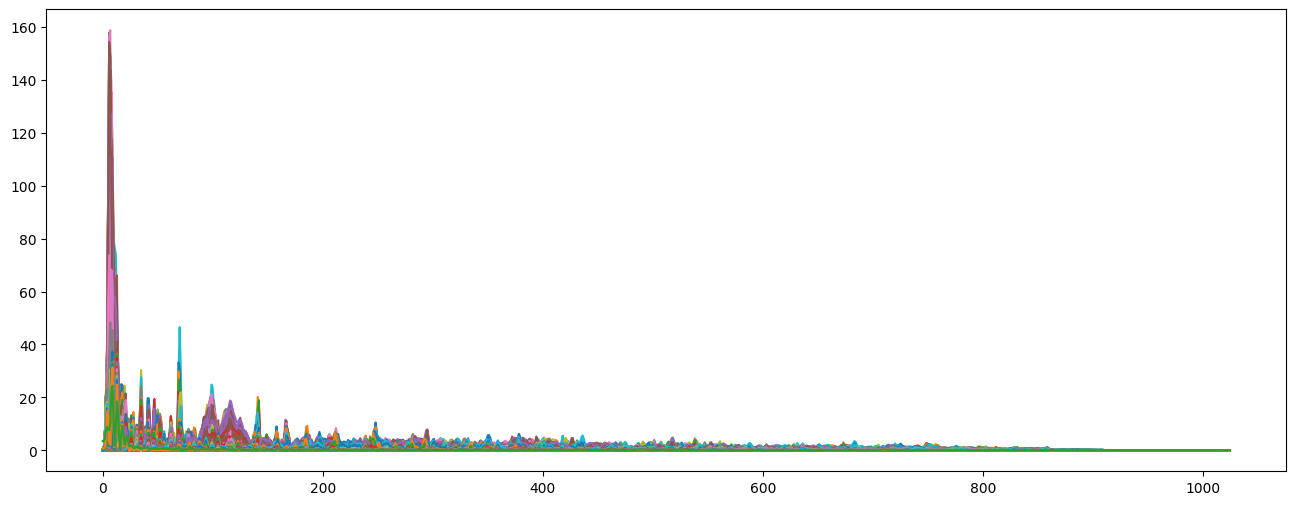

In [8]:
plt.figure(figsize = (16, 6))
plt.plot(D);

__Spectrogram__
- A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams

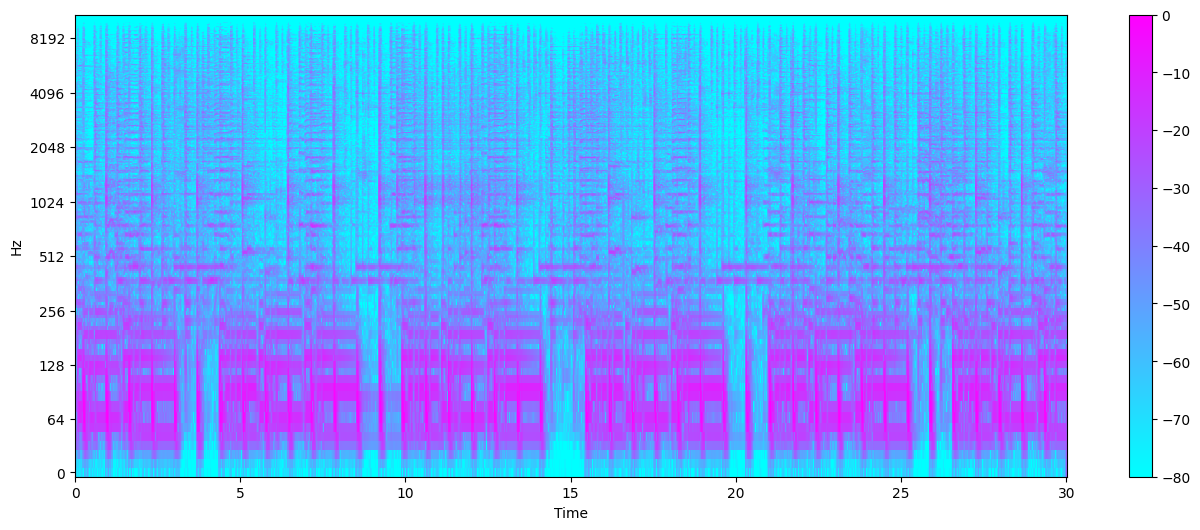

In [9]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

__Mel Spectrogram__
- The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

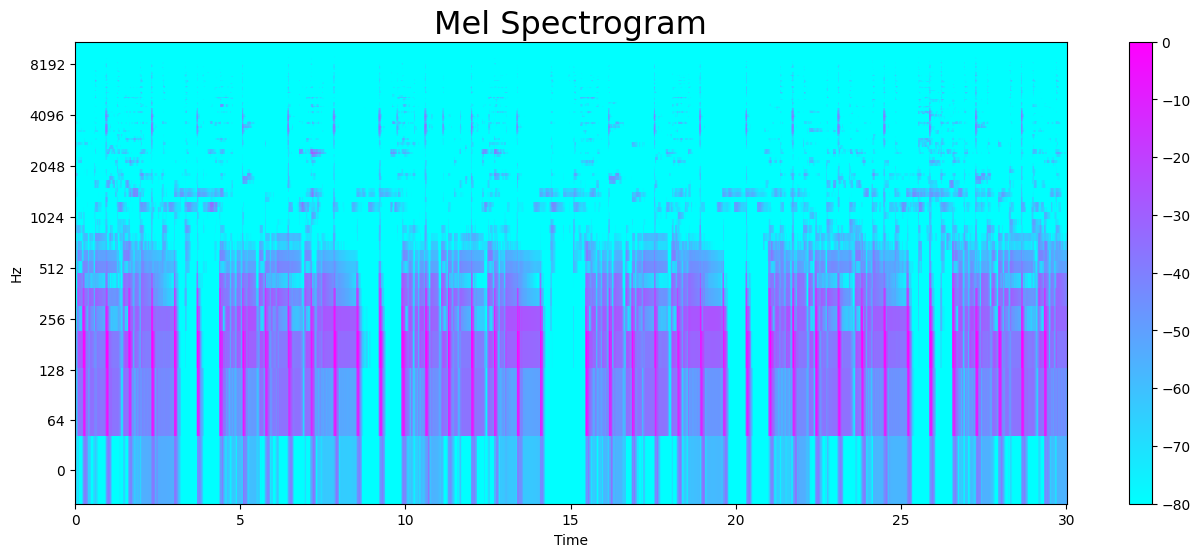

In [10]:
# Load the audio file
y, sr = librosa.load(f"{general_path}/genres_original/reggae/reggae.00036.wav")

# Trim leading and trailing silence
y, _ = librosa.effects.trim(y)

# Set the hop length (default is 512)
hop_length = 512

# Create Mel spectrogram (explicitly using keyword arguments)
S = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)

# Convert amplitude to decibels
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram", fontsize=23)
plt.show()

## AudioFeatures

**1. Zero Crossing Rate** 
- The rate at which the signal changes from positive to negative or back

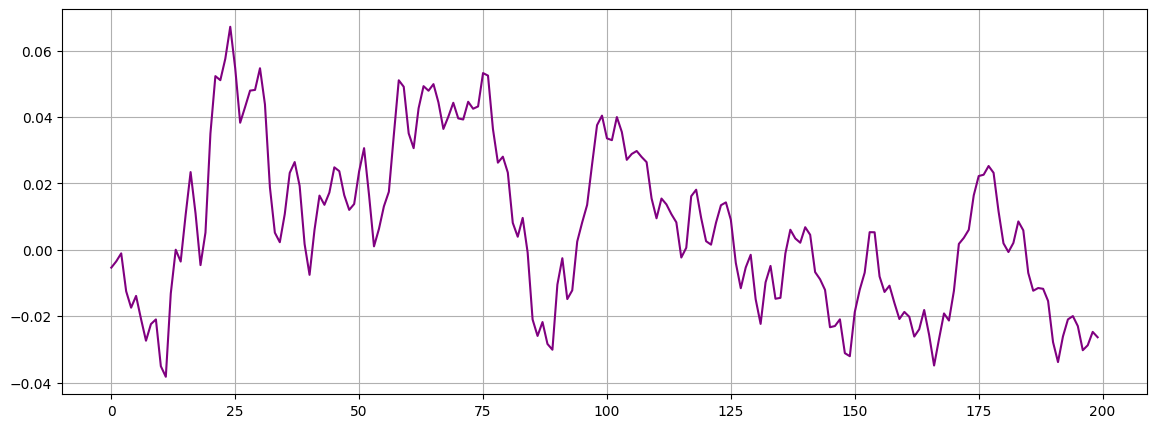

In [11]:
#The rate at which zero-crossings occur is a simple measure of the frequency content of a signal.
#Zero crossing is said to occur if successive samples have different algebric signs.
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(audio_file[start:end], color='Purple')
plt.grid()

In [12]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


__2. Harmonic and Perceptuals__
- Harmonics are characteristichs that human ears can't distinguish (represents the sound color)

- Perceptrual understanding shock wave represents the sound rhythm and emotion

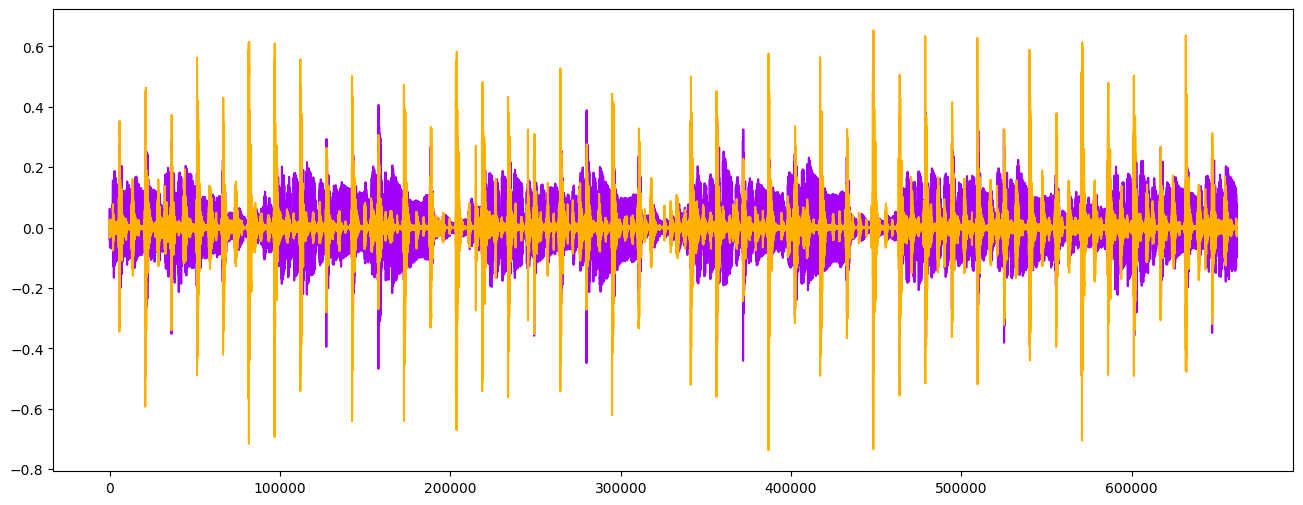

In [13]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

__3. Tempo BMP (Beats Per Minute)__ 
- Dynamic programming beat tracker

In [14]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

print(f"Tempo: {tempo} BPM")

Tempo: [86.1328125] BPM


__4. Special Centroid__
- It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [15]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476821 1946.74243805 2038.81133429 ...  766.50415702 1041.07728753
 1391.05146262] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


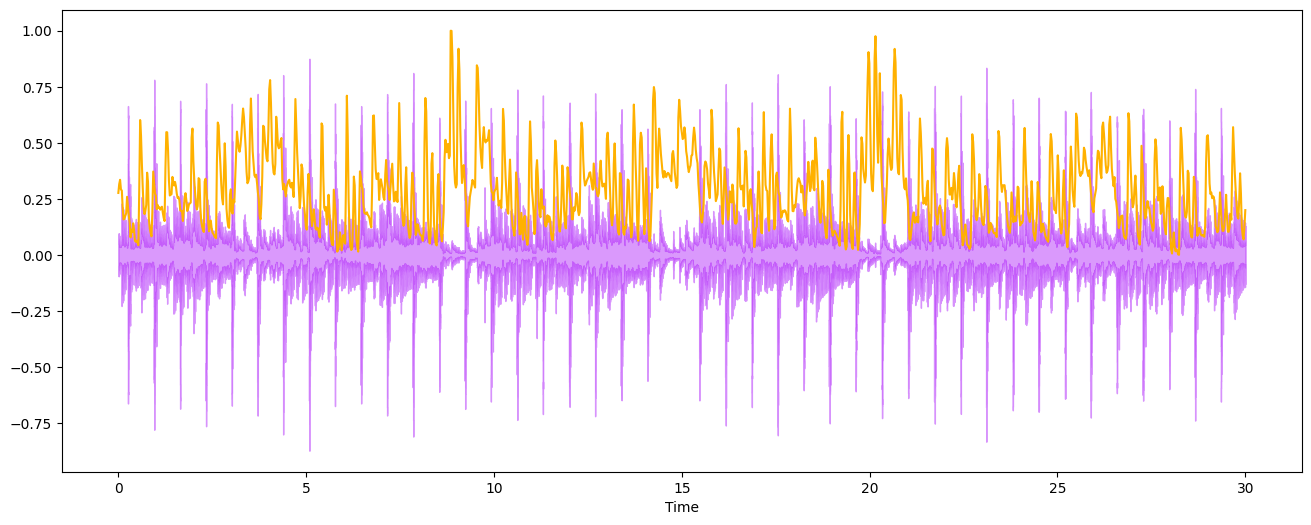

In [16]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

__5. Spectral Rolloff__
- It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

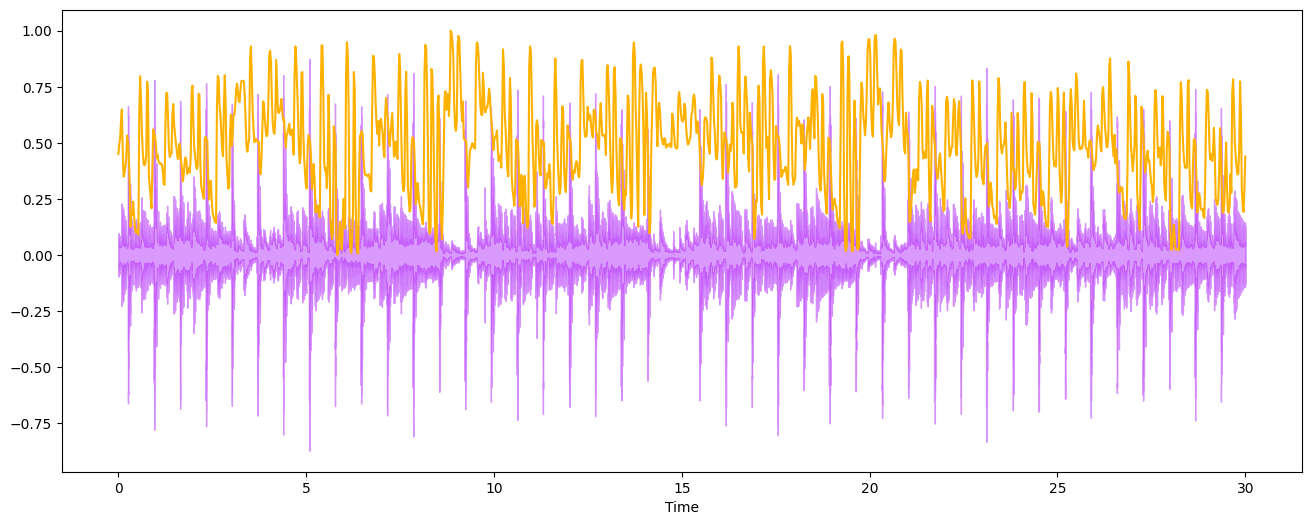

In [17]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

__6. Mel-frequency Cepstral Coefficients__
- The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


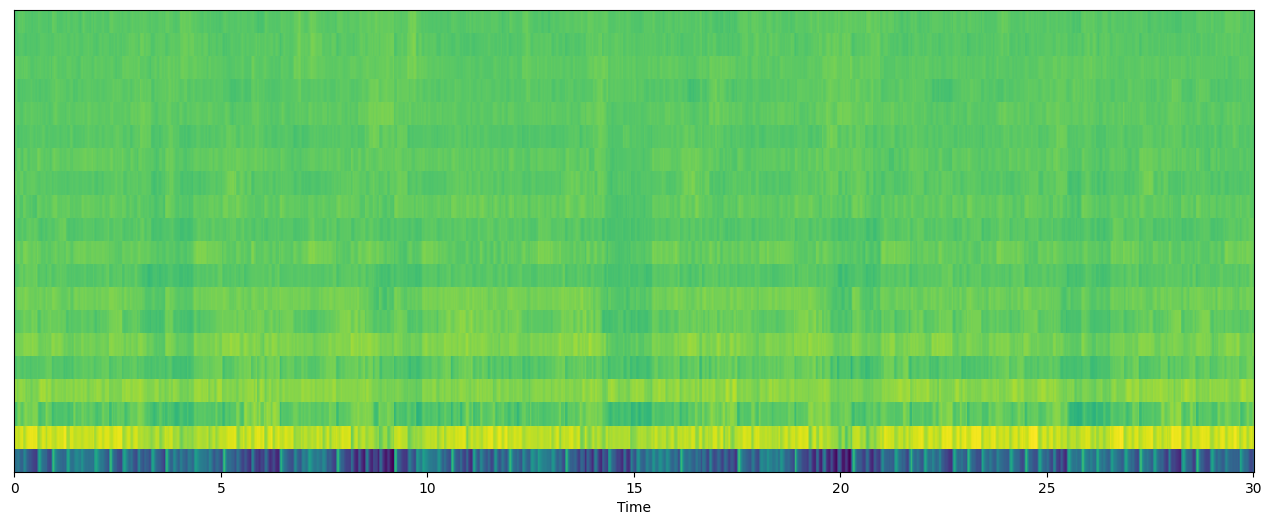

In [18]:
mfccs = librosa.feature.mfcc(y= audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'viridis');

Mean: 1.4751342e-09 

Variance: 1.0000001


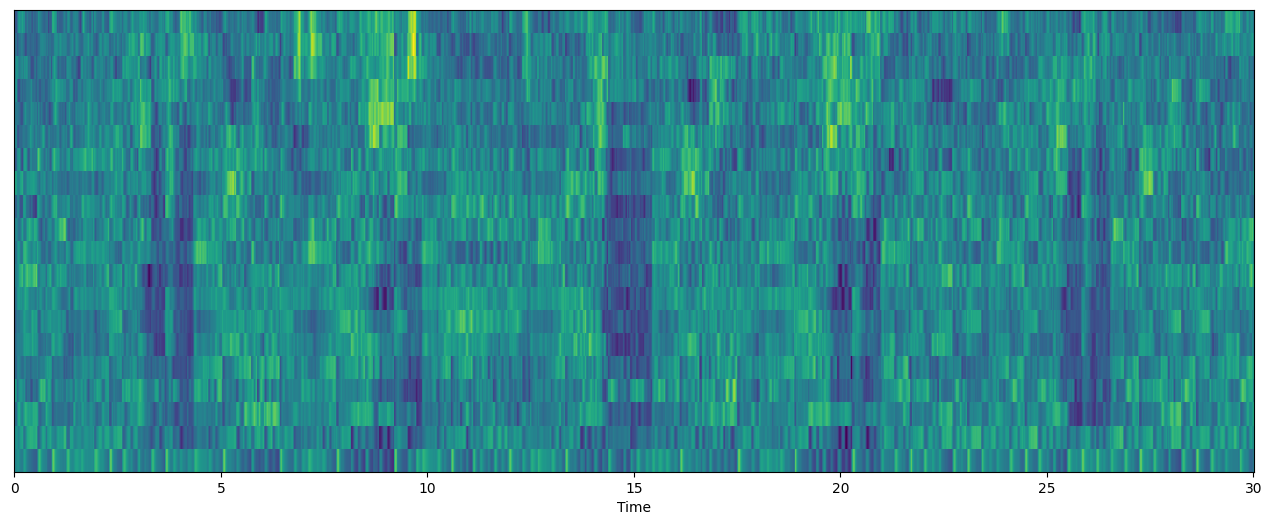

In [19]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Variance:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'viridis');

__7. Chroma Frequencies__
- Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


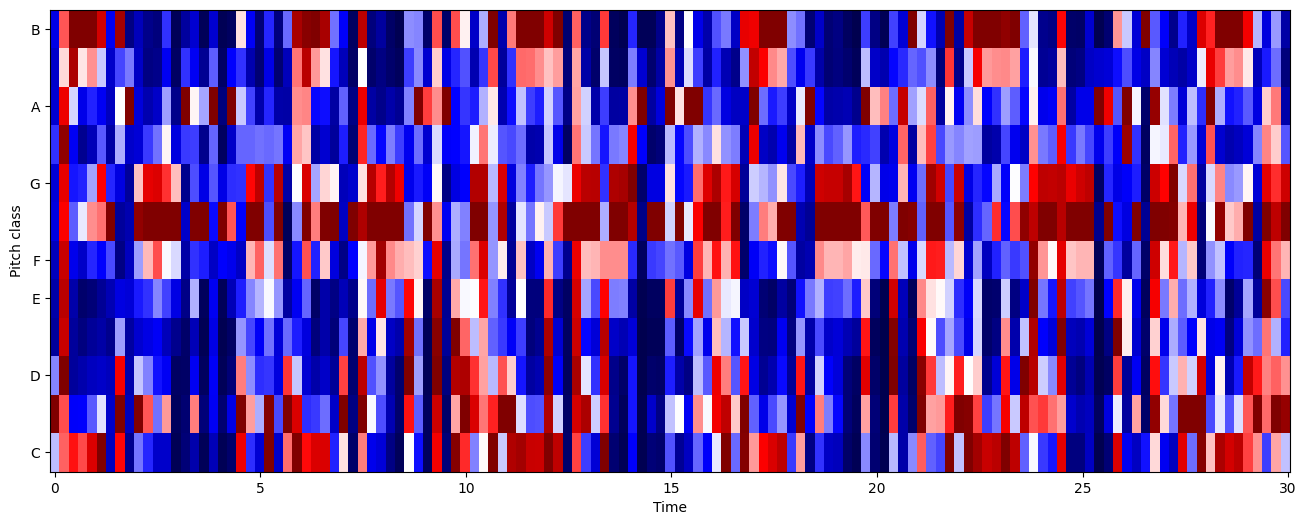

In [20]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='seismic');

# 2. DataProcessing

In [22]:
data = pd.read_csv("Dataset/features_3_sec.csv")
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [23]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

In [24]:
from sklearn import preprocessing

label_encoder =preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

import joblib   # for saving labeling and normalization parameters (later used for testing new unknown data)
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# NORMALIZE X 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)

joblib.dump(min_max_scaler, "minmax_scaler.pkl")

['minmax_scaler.pkl']

In [26]:
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [28]:
from tensorflow import keras
from keras.models import Sequential

#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function

model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax"),
    
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          30,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,338 (794.29 KB)

 Trainable params: 203,338 (794.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
#The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)

In [30]:
#Plotting the curves
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [31]:
model_history = trainModel(model=model, epochs=500, optimizer='adam')

Epoch 1/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1765 - loss: 2.2080 - val_accuracy: 0.4384 - val_loss: 1.5560
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3963 - loss: 1.6393 - val_accuracy: 0.5145 - val_loss: 1.3411
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4580 - loss: 1.4668 - val_accuracy: 0.5502 - val_loss: 1.2127
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4992 - loss: 1.3548 - val_accuracy: 0.5909 - val_loss: 1.1395
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5406 - loss: 1.2352 - val_accuracy: 0.6119 - val_loss: 1.1062
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5758 - loss: 1.1850 - val_accuracy: 0.6353 - val_loss: 1.0157
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6084 - loss: 1.1056 - val_accuracy: 0.6393 - val_loss: 1.0145
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6217 - loss: 1.0751 - val_accuracy: 0.6810 - v

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9276 - loss: 0.3425 
The test loss is : 0.366521418094635

The test Accuracy is : 92.45912432670593


In [33]:
model.save("MusicGenreClassifier.keras")

Validation Accuracy 0.9292625784873962


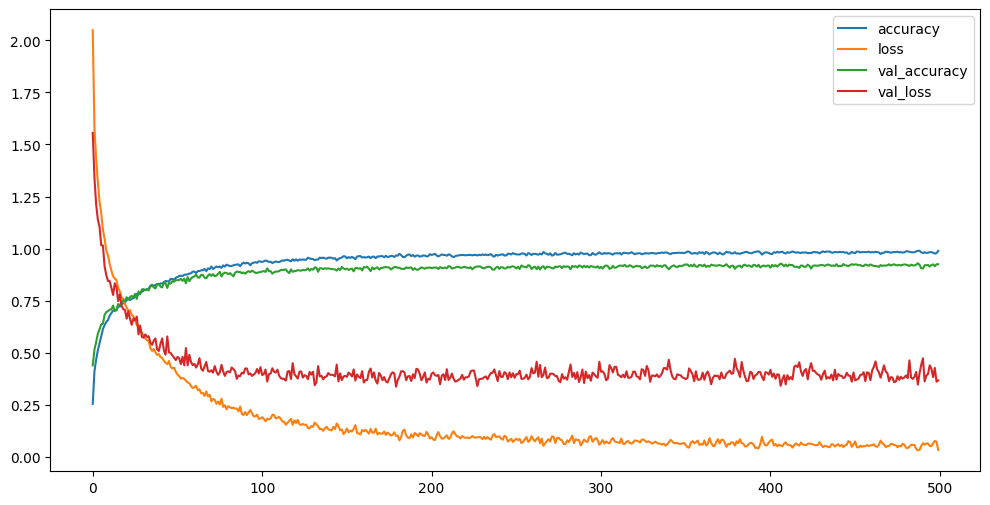

In [34]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [35]:
y_pred_test_probs=model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


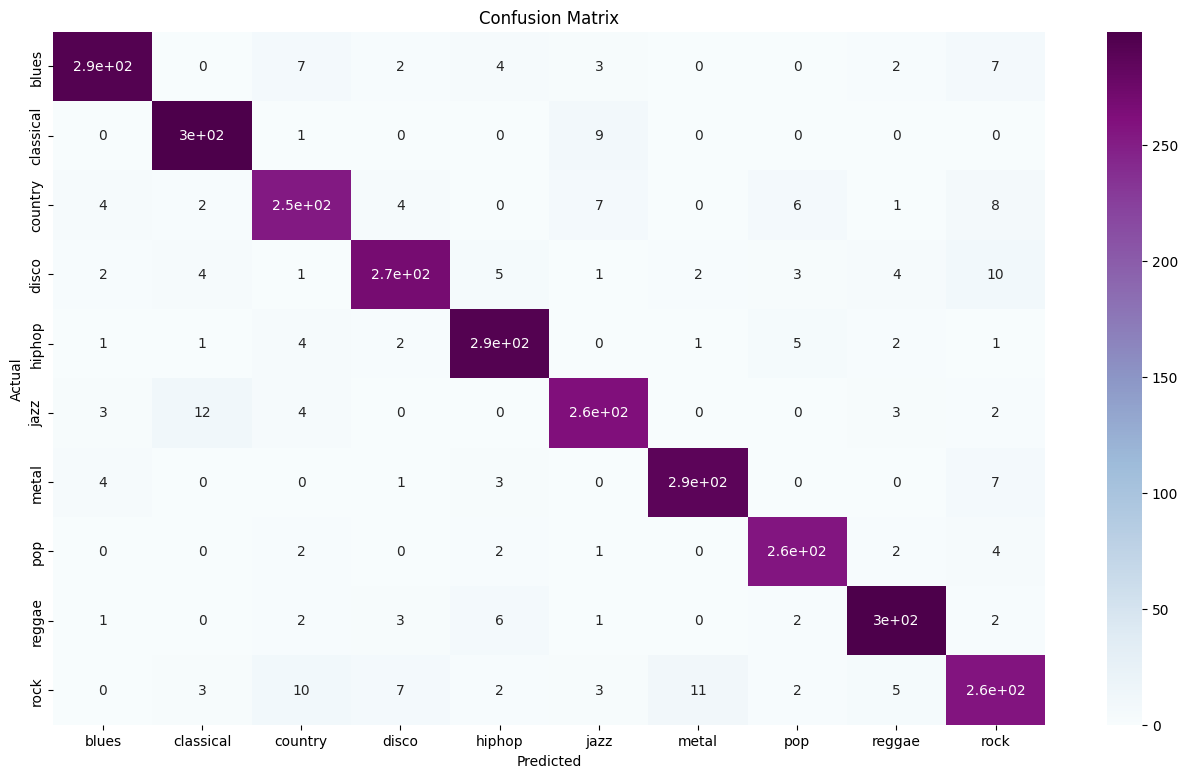

In [36]:
class_names = label_encoder.classes_
y_pred_test=np.argmax(y_pred_test_probs,axis=1)

plt.figure(figsize=(16, 9))
sns.heatmap(
    confusion_matrix(y_test, y_pred_test),
    cmap="BuPu",
    annot=True,
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()